In [2]:
# Импорт модулей и библиотек
import random
from PIL import Image, ImageDraw 
from skimage.io import imread
from skimage import io,data
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import imutils

In [3]:
# Инициализация исходных изображений
image = Image.open("01.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

In [4]:
# Преобразование в черно-белое
mode = 0
if (mode == 0):
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			S = (a + b + c) // 3
			draw.point((i, j), (S, S, S))
image.save("02.jpg", "JPEG")
del draw

In [5]:
# Преобразования в негатив
mode = 1
if (mode == 1):
	for i in range(width):
		for j in range(height):
			a = pix[i, j][0]
			b = pix[i, j][1]
			c = pix[i, j][2]
			draw.point((i, j), (255 - a , 255 - b, 255 - c))
image.save("02_neg.jpg", "JPEG")
del draw

NameError: name 'draw' is not defined

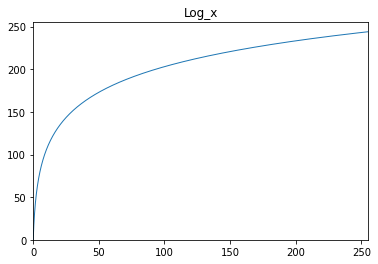

True

In [ ]:
# Прямой логарифм
def log_plot(c):
     x = np.arange(0, 256, 0.01)
     y = c * np.log(1 + x)
     plt.plot(x, y, linewidth=1)
   
     plt.title(u'Log_x')
     plt.xlim(0, 255), plt.ylim(0, 255)
     plt.show()
def log(c, image2):
    output = c * np.log(1.0 + image2)
    output = np.uint8(output + 0.5)
    return output   
image2 = cv2.imread('02.jpg')
log_plot(44)
output = log(32, image2)
cv2.imwrite ('02_log_x.jpg', output)

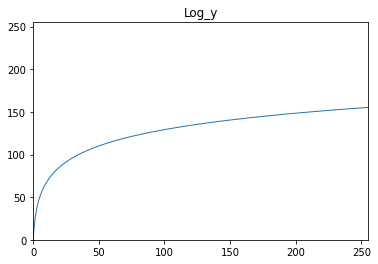

True

In [ ]:
# Обратный логарифм
e = 2.71
def log_plot(c):
     x = np.arange(0, 256, 0.01)
     y = c * np.log(1 + x)
     plt.plot(x, y, linewidth=1)
   
     plt.title(u'Log_y')
     plt.xlim(0, 255), plt.ylim(0, 255)
     plt.show()
def log(c, image2):
    inv = np.log(1.0 + image2)
    rev = e ** inv
    output = c * rev
    output = np.uint8(output + 0.5)
    return output
image2 = cv2.imread('01.jpg')
log_plot(28)
output = log(22, image2)
cv2.imwrite ('01_log_y.jpg', image2)

In [ ]:
# Преобразование степенного закона φ> 1
image = cv2.imread('01.jpg')
gamma_img1 = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gamma_img1[i, j, 0] = math.pow(image[i, j, 0], 5)
        gamma_img1[i, j, 1] = math.pow(image[i, j, 1], 5)
        gamma_img1[i, j, 2] = math.pow(image[i, j, 2], 5)
cv2.normalize(gamma_img1, gamma_img1, 0, 255, cv2.NORM_MINMAX)
gamma_img1 = cv2.convertScaleAbs(gamma_img1)
cv2.imwrite("01_deg_x.png",gamma_img1 )

True

In [ ]:
# Преобразование степенного закона, φ <1
image = cv2.imread('01.jpg')
gamma_img2 = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        gamma_img2[i, j, 0] = math.pow(image[i, j, 0], 0.4)
        gamma_img2[i, j, 1] = math.pow(image[i, j, 1], 0.4)
        gamma_img2[i, j, 2] = math.pow(image[i, j, 2], 0.4)
cv2.normalize(gamma_img2, gamma_img2, 0, 255, cv2.NORM_MINMAX)
gamma_img2 = cv2.convertScaleAbs(gamma_img2)
cv2.imwrite("01_deg_y.png",gamma_img2 )

True

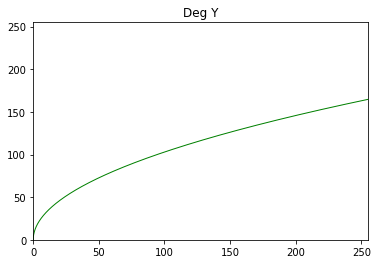

In [ ]:
def gamma_plot(c, v):
     x = np.arange(0, 256, 0.01)
     y = c*x**v
     plt.plot(x, y, 'g', linewidth=1)
     plt.title(u'Deg Y')
     plt.xlim([0, 255]), plt.ylim([0, 255])
     plt.show()
gamma_plot(10.20, 0.502)

In [ ]:
# Кусочно-линейное преобразование
image = cv2.imread('01.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
r_min, r_max = 255, 0
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if gray_img[i, j] > r_max:
            r_max = gray_img[i, j]
        if gray_img[i, j] < r_min:
            r_min = gray_img[i, j]
r1, s1 = r_min, 0
r2, s2 = r_max, 255
precewise_img = np.zeros((gray_img.shape[0], gray_img.shape[1]), dtype=np.uint8)
k1 = s1 / r1
k3 = (255 - s2) / (255 - r2)
k2 = (s2 - s1) / (r2 - r1)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        if r1 <= gray_img[i, j] <= r2:
            precewise_img[i, j] = k2 * (gray_img[i, j] - r1)
        elif gray_img[i, j] < r1:
            precewise_img[i, j] = k1 * gray_img[i, j]
        elif gray_img[i, j] > r2:
            precewise_img[i, j] = k3 * (gray_img[i, j] - r2)
    cv2.imwrite("01_sl.jpg",precewise_img )

C:\Users\leono\AppData\Local\Temp\ipykernel_17348\590256285.py:14: RuntimeWarning: invalid value encountered in true_divide
  k1 = s1 / r1
C:\Users\leono\AppData\Local\Temp\ipykernel_17348\590256285.py:15: RuntimeWarning: invalid value encountered in long_scalars
  k3 = (255 - s2) / (255 - r2)


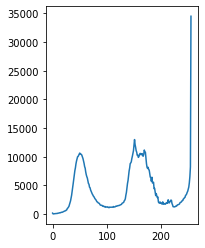

True

In [5]:
# Вырезание уровнений 
wiki_img=cv2.imread('02.jpg')
wiki_gray=cv2.cvtColor(wiki_img,cv2.COLOR_BGR2GRAY)
wiki_equ=cv2.equalizeHist(wiki_gray)
hist=cv2.calcHist([wiki_gray],[0],None,[256],[0,256])
equ_hist=cv2.calcHist([wiki_equ],[0],None,[256],[0,256])
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
x = np.arange(0,256,0.001)
y = np.sin(x/81)*20000
y_masked = np.ma.masked_where(y < -0.5, y)
ax1.plot(hist)
#ax1.plot(x,y_masked)
#ax2=fig.add_subplot(1,2,2)
#ax2.plot(equ_hist)
plt.show()
cv2.imwrite("01_cl_d.jpg",wiki_equ )